# 1、数据处理

In [1]:
import pandas as pd
import tensorflow as tf
data_file = '../../代码/推荐算法-FM/data/train.txt'
df = pd.read_csv(data_file, 
                     engine='python')
df.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [2]:
dense_features = ['I'+ str(i) for i in range(1,14)]
sparse_features = ['C' + str(i) for i in range(1, 27)]
pd.isnull(df)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,True
3,False,True,False,True,True,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,True
4,False,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,True,True
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1997,False,True,False,False,True,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False


In [3]:
df[dense_features] = df[dense_features].fillna(0)
df[sparse_features] = df[sparse_features].fillna('-1')

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
#dense_feature做归一化
df[dense_features] = MinMaxScaler().fit_transform(df[dense_features])
#label encoder
for s_f in sparse_features:
    df[s_f] = LabelEncoder().fit_transform(df[s_f])
df[:3]

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.010526,0.000381,0.000591,0.000000,0.001361,0.000862,0.009047,0.003656,0.032109,...,8,510,23,3,40,0,1,585,27,321
1,0,0.021053,0.000254,0.005203,0.011494,0.000100,0.001725,0.001206,0.003656,0.000710,...,0,364,23,1,479,0,1,194,27,244
2,0,0.021053,0.000254,0.000118,0.160920,0.000756,0.019189,0.002413,0.003656,0.043463,...,6,114,0,0,1094,3,1,163,0,0


In [4]:
import collections

DEFAULT_GROUP_NAME = "default_group"

DenseFeat = collections.namedtuple('DenseFeat',['name'])
SparseFeat= collections.namedtuple('SparseFeat', ['name','feat_onehot_dim','embed_dim','group_name','trainable'])

embed_dim=16
feature_columns = [DenseFeat(x) for x in dense_features] + [SparseFeat(x, df[x].nunique(), embed_dim, DEFAULT_GROUP_NAME, True)  for x in sparse_features]
feature_columns


[DenseFeat(name='I1'),
 DenseFeat(name='I2'),
 DenseFeat(name='I3'),
 DenseFeat(name='I4'),
 DenseFeat(name='I5'),
 DenseFeat(name='I6'),
 DenseFeat(name='I7'),
 DenseFeat(name='I8'),
 DenseFeat(name='I9'),
 DenseFeat(name='I10'),
 DenseFeat(name='I11'),
 DenseFeat(name='I12'),
 DenseFeat(name='I13'),
 SparseFeat(name='C1', feat_onehot_dim=79, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C2', feat_onehot_dim=252, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C3', feat_onehot_dim=1293, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C4', feat_onehot_dim=1043, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C5', feat_onehot_dim=30, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C6', feat_onehot_dim=7, embed_dim=16, group_name='default_group', trainable=True),
 SparseFeat(name='C7', feat_onehot_dim=1164, embed_dim=16, group_name='default_gr

In [5]:
#数据集划分
Y = df['label']
X = df.drop(['label'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = [X_train[i.name] for i in feature_columns]
X_test = [X_test[i.name] for i in feature_columns]

# 2、构建模型

## 2.1 定义层

In [6]:
import tensorflow as tf
class FMLayer(tf.keras.layers.Layer):
    def __init__(self, k,w_reg, v_reg):
        super().__init__()
        self.k = k
        self.w_reg = w_reg
        self.v_reg = v_reg
    def build(self, input_shape):
        super().build(input_shape)
        
        self.w0 = self.add_weight(name='w0', shape=(1,),
                                 initializer=tf.zeros_initializer(),
                                 trainable=True,)
        self.w1 = self.add_weight(name='w1',shape=(input_shape[-1],1),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 regularizer=tf.keras.regularizers.l2(w_reg))
        self.v = self.add_weight(name='v',shape=(input_shape[-1],k),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 regularizer=tf.keras.regularizers.l2(v_reg))
        
    def call(self,inputs,**kwargs):
        #inputs shape(batch_size, feature_size) 乘以 （feature_size, 1）
        #输出shape:(batchsize, 1)
        linear_part = tf.matmul(inputs,  self.w1) + self.w0
        #(batch_size,feature_size) 乘以（feature_size, k）
        inter_part1 = pow(tf.matmul(inputs, self.v),2)
        inter_part2 = tf.matmul(pow(inputs, 2), pow(self.v, 2))
        inter_part = 0.5*tf.math.reduce_sum(inter_part1 - inter_part2, axis=-1, keepdims=True)
        output = linear_part + inter_part
        #output的shape为（batch_size, 1）
        return output
    

In [7]:
class DNN(tf.keras.layers.Layer):
    def __init__(self, hidden_units, output_dim, activation):
        super().__init__()
        self.hidden_units = hidden_units
        self.output_dim = output_dim
        self.activation = activation
        
        self.hidden_layer = [tf.keras.layers.Dense(i, activation=self.activation) for i in hidden_units]
        self.output_layer = tf.keras.layers.Dense(output_dim, activation=None)
    def build(self, inputshape):
        super(DNN,self).build(inputshape)
    
    def call(self, inputs):
        x = inputs
        for l in self.hidden_layer:
            output = l(x)
            x = output
        output = self.output_layer(x)
        return output
    
    def get_config(self, ):
        config = {'hidden_units': self.hidden_units, 'output_dim': self.output_dim,
                  'activation': self.activation}
        base_config = super(DNN, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

# 2.2 定义模型

In [8]:
def DeepFM(feature_columns, k, w_reg, v_reg, hidden_units, output_dim, activation):
 
    #input_features = collections.OrderedDict() #思考，这里为什么要用有序字典
    #dict也可以保证插入顺序只是不能排序
    input_features = {} 
    #定义input层
    for fc in feature_columns:
        if isinstance(fc, SparseFeat):
            input_features[fc.name] = tf.keras.Input(
                shape=(1,), name=fc.name)
            #shape(None, 1)
        elif isinstance(fc, DenseFeat):
            input_features[fc.name] = tf.keras.Input(
                shape=(1,), name= fc.name)
            
    #作为model的inputs
    user_inputs_list = list(input_features.values())
    
    
    #sparse类型定义embedding层
    sparse_feature_columns = list(
        filter(lambda x: isinstance(x, SparseFeat), feature_columns)) if feature_columns else []
    
    
    sparse_emb_out_dict = {}
    for feat in sparse_feature_columns:
        emb_name = 'emb_' + str(feat.name)
        emb = tf.keras.layers.Embedding(feat.feat_onehot_dim, feat.embed_dim,
                        name=emb_name)(input_features[feat.name])
        #print(emb.shape) (None, 1, 16)
        emb.trainable = feat.trainable
        sparse_emb_out_dict[emb_name] = emb
    
    sparse_dnn_input = tf.concat(list(sparse_emb_out_dict.values()),axis=1)#shape(None, 26, 16)
    sparse_dnn_input = tf.keras.layers.Flatten()(sparse_dnn_input)#shape(None, 416)
    
    #dense类型的input
    dense_feature_columns = list(filter(lambda x : isinstance(x, DenseFeat), feature_columns)) if feature_columns else []
    
    dense_dnn_input = tf.concat(list(input_features[feat.name] for feat in dense_feature_columns), axis=-1) #shape(None,13)
    
    #下层fm和dnn的输入
    dnn_input = tf.concat([sparse_dnn_input, dense_dnn_input],axis=-1) #shape(None, 429)
    

    fm_output = FMLayer(k, w_reg, v_reg)(dnn_input)
    dense_output = DNN(hidden_units, output_dim, activation)(dnn_input)
    
    output = tf.nn.sigmoid(0.5*(fm_output + dense_output))
        

    model = tf.keras.Model(user_inputs_list, outputs=output)
    return model
    

In [9]:
k = 10
w_reg = 1e-4
v_reg = 1e-4
hidden_units = [256, 128, 64]
output_dim = 1
activation = 'relu'

model = DeepFM(feature_columns,  k, w_reg, v_reg, hidden_units, output_dim, activation)
#tf.data.Dataset.from_tensor_slices(将numpy数据转换为dataset)
#train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
#train_dataset = train_dataset.batch(32).prefetch(tf.data.experimental.AUTOTUNE)

#训练方式一
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10)

logloss, auc = model.evaluate(X_test, Y_test)
print('logloss {}\nAUC {}'.format(round(logloss,2), round(auc,2)))
model.summary()


2022-11-30 11:42:34.112004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
50/50 [==============================] - 2s 3ms/step - loss: 0.5161 - accuracy: 0.7817
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8086
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.9068
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9600
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9819
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9919
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 8/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9969
Epoch 9/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 2.1475 - accuracy: 0.7350
logloss 2.15
AUC 0.

                                                                                                  
 emb_C10 (Embedding)            (None, 1, 16)        14528       ['C10[0][0]']                    
                                                                                                  
 emb_C11 (Embedding)            (None, 1, 16)        14816       ['C11[0][0]']                    
                                                                                                  
 emb_C12 (Embedding)            (None, 1, 16)        19824       ['C12[0][0]']                    
                                                                                                  
 emb_C13 (Embedding)            (None, 1, 16)        13184       ['C13[0][0]']                    
                                                                                                  
 emb_C14 (Embedding)            (None, 1, 16)        320         ['C14[0][0]']                    
          

                                                                                                  
 I12 (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 I13 (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 flatten (Flatten)              (None, 416)          0           ['tf.concat[0][0]']              
                                                                                                  
 tf.concat_1 (TFOpLambda)       (None, 13)           0           ['I1[0][0]',                     
                                                                  'I2[0][0]',                     
                                                                  'I3[0][0]',                     
          

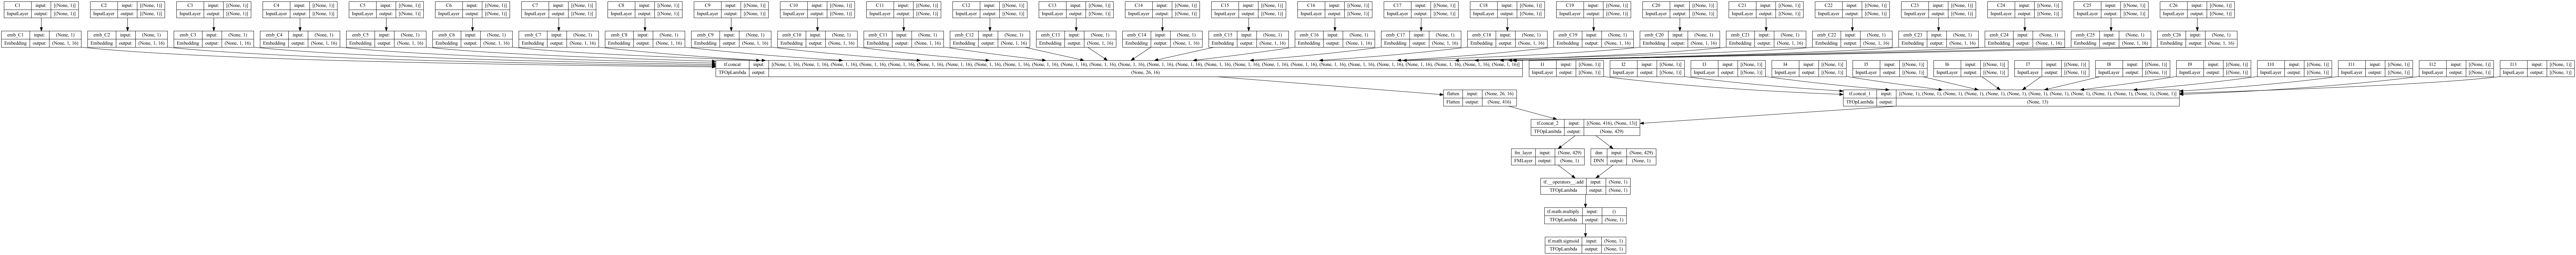

In [10]:
tf.keras.utils.plot_model(model, to_file='DeepFm_model.png', show_shapes=True)